In [86]:
import numpy as np
import pandas as pd

In [87]:
df = pd.read_csv('spam.csv',encoding = "ISO-8859-1")

In [88]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
276,ham,Tell rob to mack his gf in the theater,NaN,NaN,NaN
5404,ham,Pls give her prometazine syrup. 5mls then &lt...,NaN,NaN,NaN
5065,ham,I calls you later. Afternoon onwords mtnl serv...,NaN,NaN,NaN
4144,ham,Lol I would but despite these cramps I like be...,NaN,NaN,NaN
3274,ham,Hurry home u big butt. Hang up on your last ca...,NaN,NaN,NaN


In [89]:
df.shape

(5572, 5)

In [90]:
#Steps involved while makeing detector
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deployement

## 1. Data Cleaning

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [92]:
#dropping last 3 cols
df=df.drop(df.iloc[:,2:5], axis=1)

In [93]:
df.sample(5)

,v1,v2
5437,ham,Am slow in using biola's fne
2989,ham,"Love isn't a decision, it's a feeling. If we c..."
2902,ham,Tell me pa. How is pain de.
5462,spam,Txt: CALL to No: 86888 & claim your reward of ...
2359,spam,Spook up your mob with a Halloween collection ...


In [94]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3964,ham,Love you aathi..love u lot..
404,ham,"Yep, the great loxahatchee xmas tree burning o..."
4603,ham,THANX 4 PUTTIN DA FONE DOWN ON ME!!
845,ham,Meanwhile in the shit suite: xavier decided to...
522,ham,Were gonna go get some tacos


In [95]:
import sklearn
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [96]:
df['target']=encoder.fit_transform(df['target'])    #0:ham,1:spam

In [97]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [98]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [99]:
#check for duplicate values
df.duplicated().sum()

403

In [100]:
#remove duplicate
df=df.drop_duplicates(keep='first')

In [101]:
df.duplicated().sum()

0

In [102]:
df.shape

(5169, 2)

## 2. EDA

In [103]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [104]:
import matplotlib.pyplot as plt

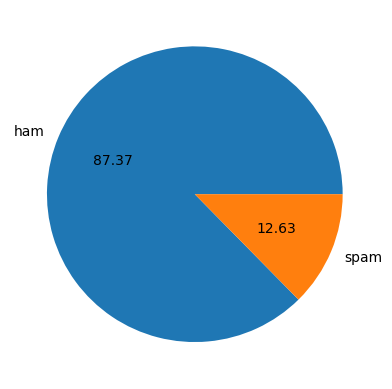

In [105]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

### note - Data is imbalanced

In [106]:
!pip install nltk

In [107]:
import nltk    #natural language toolkit

In [108]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [109]:
#fetching the total number of characters used in each messages
df['num_characters']=df['text'].apply(len)

In [110]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [111]:
#fetching num of words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [112]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [113]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [114]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [115]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [116]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [117]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [118]:
import seaborn as sns

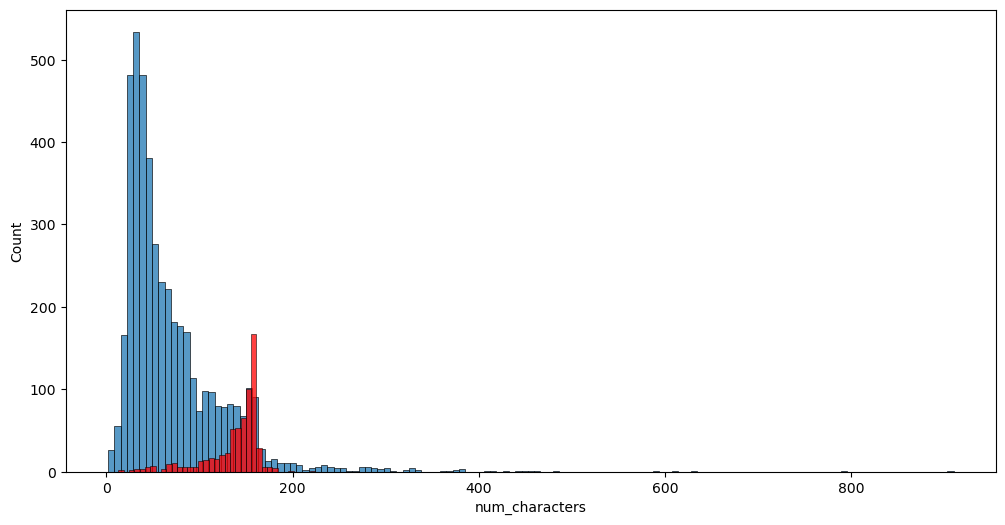

In [119]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='r')
plt.show()

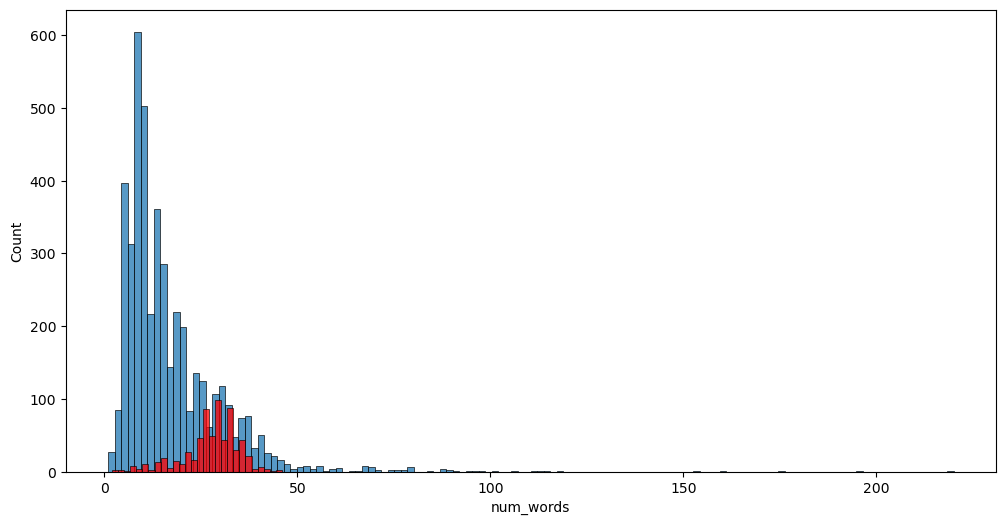

In [120]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='r')
plt.show()

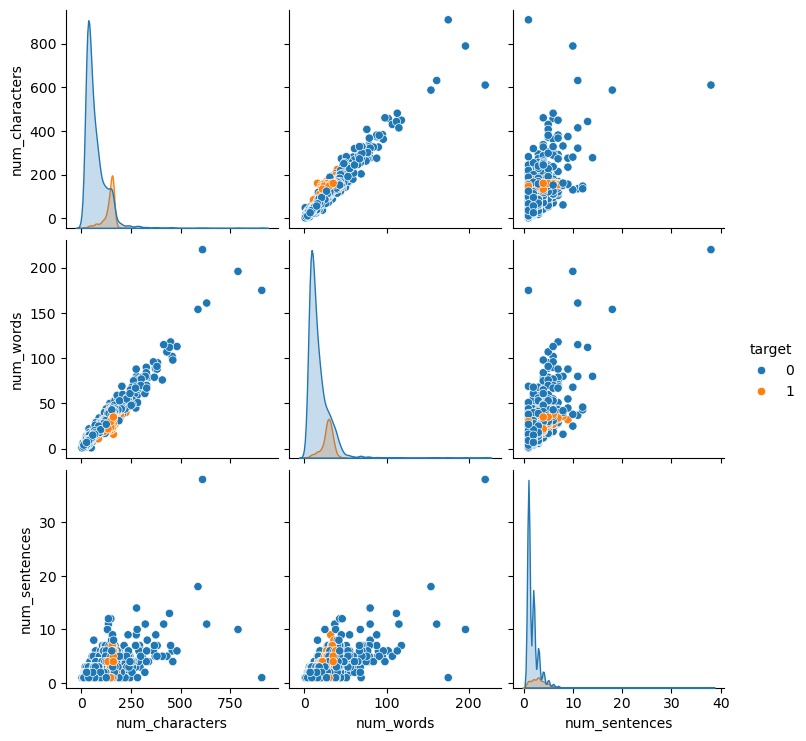

In [121]:
sns.pairplot(df,hue='target')
plt.show()

<Axes: >

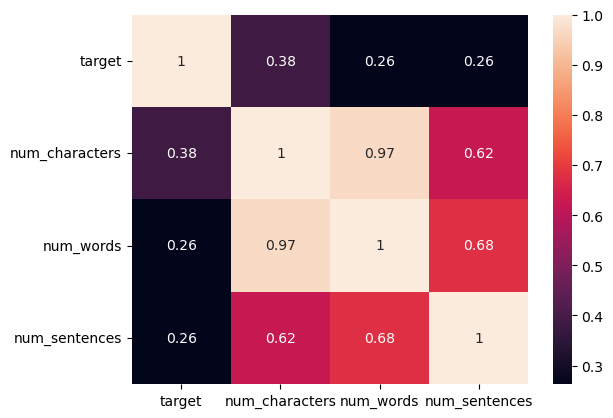

In [122]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

## 3. Data Preprocessing

- Lower case
- Tokenization
- Removal of special characters
- Removal of stop words and punctuation
- Stemming           

Stemming - to get the words in root form like dance,dancing,danced to dance

In [123]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [124]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [125]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [126]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [127]:
ps.stem('loved')

'love'

In [128]:
def transform_text(text):
#Lower case
    text=text.lower()
#Tokenization
    text=nltk.word_tokenize(text)

#Removal of special characters
    y=[]
    for i in text:
        if i.isalnum():   #removing special characters, here isalnum function will only return which are alphabets or numeric
            y.append(i)   #others special characters will be removed. which further appended to empty list y
        
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)  #first list 'y' without special characters but having stop words and punctuations is copied to 
                         #variable 'text' and then list 'y' is cleared. After that words from text variable is given in loop
                         #for removing stop words and punctuations then list of words without stop words and punctuations
                         #is appended to cleared variable 'y' for only having words without special characters, stop words and
                         #punctuations.
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    return "  ".join(y)

In [129]:
transform_text('I loved The YOUTUBE lectures on Machine Learning?')

'love  youtub  lectur  machin  learn'

In [130]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [131]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
)

'go  jurong  point  crazi  avail  bugi  n  great  world  la  e  buffet  cine  got  amor  wat'

In [132]:
df['transformed_text']=df['text'].apply(transform_text)

In [133]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [134]:
!pip install wordcloud

In [135]:
import wordcloud

In [136]:
#wordcloud is used to form the cloud of most used words
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=1000,min_font_size=10,background_color='black')

In [137]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

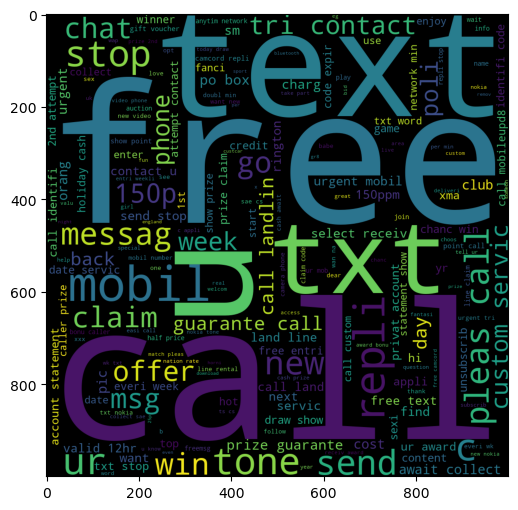

In [138]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [139]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

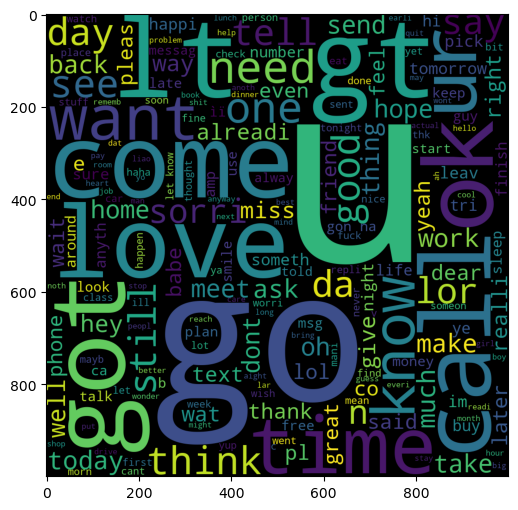

In [140]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [141]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [142]:
len(spam_corpus)

9939

In [143]:
#Counter class is used to get the most commonly used words
from collections import Counter

<function matplotlib.pyplot.show(close=None, block=None)>

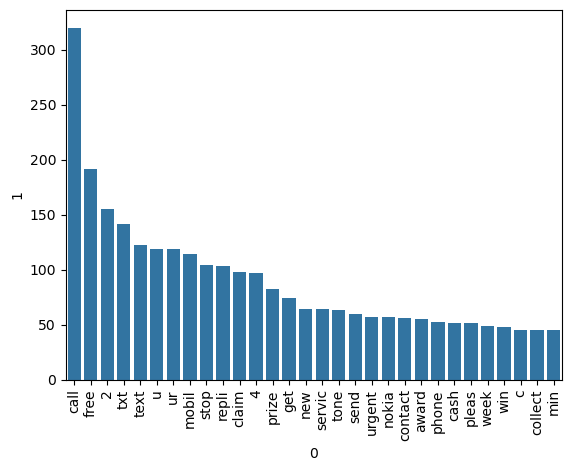

In [144]:
#below garph shows the most 30 common words used in spam messages
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show

In [145]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [146]:
len(ham_corpus)

35404

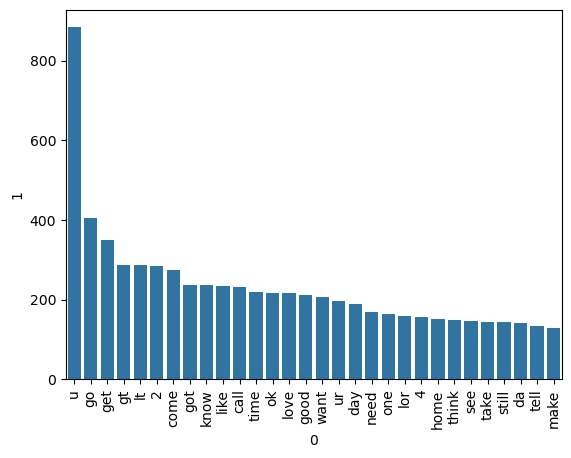

In [147]:
#below garph shows the most 30 common words used in ham messages
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [148]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [149]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [150]:
#appending the num_characters col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [151]:
X.shape

(5169, 3000)

In [152]:
y = df['target'].values

In [153]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [156]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [157]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [158]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [159]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [160]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [161]:
import pickle

In [163]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))